In [2]:
from matplotlib import colormaps
import matplotlib.pyplot as plt
list(colormaps)
import cv2 as cv
import numpy as np

<class 'tuple'>


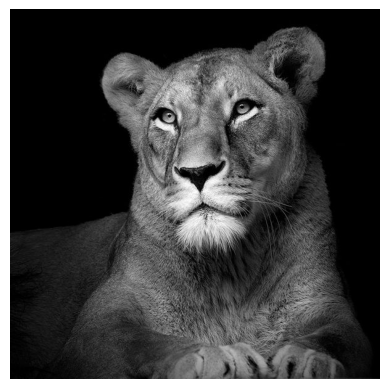

In [3]:
img = cv.imread("lion.jpg")
print(type(img.shape))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
#plt.imshow(img,)
plt.axis('off')
plt.show()

In [4]:
type(img)

numpy.ndarray

In [5]:
sum = np.sum(img, axis=1)
sum

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     8,     8,
           8,     8,     8,     8,     8,     8,    82,   102,   112,
         127,   292,   884,  1926,  2863,  3390,  3632,  3627,  3867,
        4057,  4056,  4413,  4601,  4716,  5080,  5326,  5414,  5659,
        5955,  6550,  6622,  6947,  7307,  7558,  7847,  7891,  8152,
        8419,  8547,  8538,  8720,  8895,  9197,  9096,  9146, 10090,
       11026, 12528, 13338, 14024, 14892, 15688, 16054, 17139, 17824,
       18807, 19759, 21263, 21934, 22402, 23257, 23950, 23642, 24069,
       24781, 24717, 24963, 25630, 26082, 26443, 28122, 29438, 30324,
       31261, 32087, 33037, 33757, 33982, 34630, 34567, 34939, 35424,
       36213, 37574, 37868, 37612, 37730, 37760, 37822, 38366, 38967,
       38788, 38071, 38944, 38755, 38654, 38836, 38895, 38608, 39335,
       39268, 39131, 39088, 38572, 38271, 38360, 39502, 39970, 39781,
       40140, 40067,

In [6]:
img.shape[1]

600

In [7]:
sum.shape

(600,)

In [8]:
def get_boundary_sum(img):
    horizontal_top = img[0,:]
    horizontal_bottom = img[-1,:]
    vertical_left = img[:,0]
    vertical_right = img[:,-1]
    boundary_sum = np.sum(horizontal_top) + np.sum(horizontal_bottom) + np.sum(vertical_left) + np.sum(vertical_right)-horizontal_top[0]-horizontal_top[-1]-horizontal_bottom[0]-horizontal_bottom[-1]
    return boundary_sum

In [9]:
get_boundary_sum(img)
img2 = np.copy(img)

In [10]:
#replace middle 
img2[img.shape[0]//2, img.shape[1]//2] = get_boundary_sum(img)

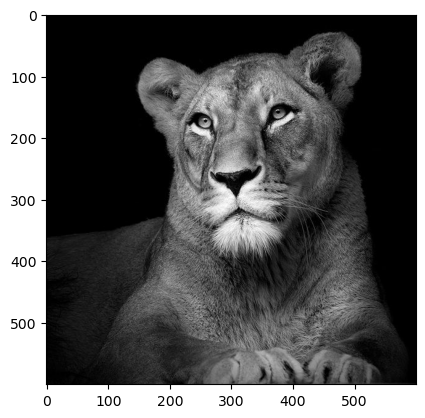

In [11]:
plt.imshow(img2, cmap='gray')

In [12]:
def get_diagonal_sum(img):
    diagonal_1 = np.trace(img)
    diagonal_2 = np.trace(np.fliplr(img))
    diagonal_sum = diagonal_1 + diagonal_2 - img[img.shape[0]//2, img.shape[1]//2]
    return diagonal_sum

In [13]:
get_diagonal_sum(img)

79037

In [14]:
img2[img.shape[0]//2, img.shape[1]//2] = get_diagonal_sum(img2)

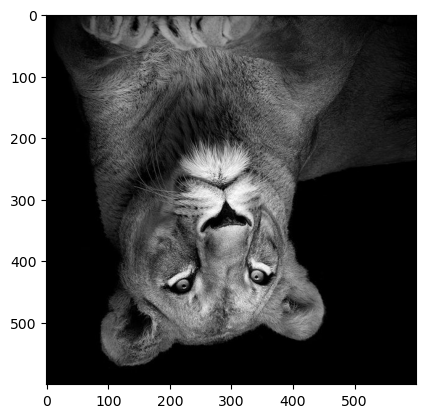

In [15]:
plt.imshow(np.flip(img2), cmap='gray')

In [16]:
img

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  5,  5,  4],
       [ 0,  1,  2, ..., 19, 18, 18]], dtype=uint8)

In [17]:
def split(img):
    img1 = img[:img.shape[0]//2, :img.shape[1]//2]
    img2 = img[:img.shape[0]//2, img.shape[1]//2:]
    img3 = img[img.shape[0]//2:, :img.shape[1]//2]
    img4 = img[img.shape[0]//2:, img.shape[1]//2:]
    return img1, img2, img3, img4

In [18]:
img1, img2, img3, img4 = split(img)

In [19]:
img_merge = np.concatenate((np.concatenate((img1, img2), axis=1), np.concatenate((img3, img4), axis=1)), axis=0)

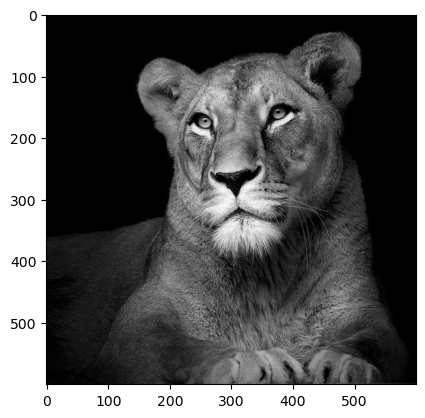

In [20]:
plt.imshow(img_merge, cmap='gray')

(-0.5, 299.5, 299.5, -0.5)

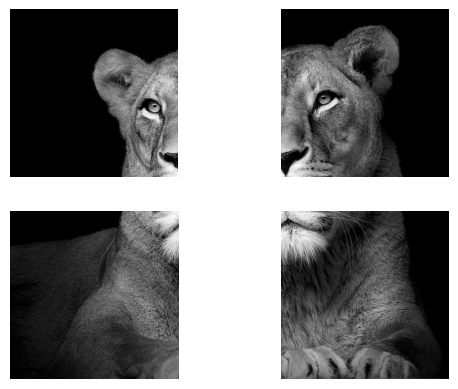

In [21]:
plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(img2, cmap='gray')
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(img3, cmap='gray')
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(img4, cmap='gray')
plt.axis("off")


In [22]:
img2 = np.copy(img)
row = img2.shape[0]
column = img2.shape[1]

In [23]:
img2 = np.reshape(img2,img2.shape[0]*img2.shape[1])

In [24]:
print(img2)

[ 0  0  0 ... 19 18 18]


In [25]:
img2=np.sort(img2)
img2.shape

(360000,)

In [26]:
hist = np.zeros(256)
for i in img2:
    hist[i] = hist[i]+1

In [27]:
hist = hist/(row*column)

In [28]:
np.arange(256)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<BarContainer object of 256 artists>

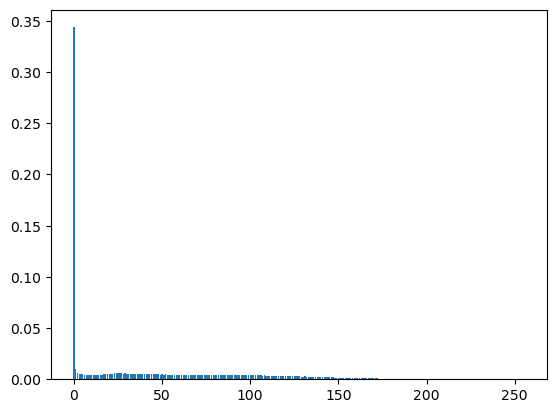

In [29]:
plt.bar(np.arange(256),hist)

In [30]:
hist_difference = np.array([x if i%5 == 0 else 0 for i,x in enumerate(hist)])

In [31]:
for i in hist_difference:
    print(i)

0.34376111111111113
0.0
0.0
0.0
0.0
0.004686111111111111
0.0
0.0
0.0
0.0
0.003763888888888889
0.0
0.0
0.0
0.0
0.004233333333333334
0.0
0.0
0.0
0.0
0.005188888888888889
0.0
0.0
0.0
0.0
0.005908333333333333
0.0
0.0
0.0
0.0
0.005358333333333333
0.0
0.0
0.0
0.0
0.004888888888888889
0.0
0.0
0.0
0.0
0.004916666666666666
0.0
0.0
0.0
0.0
0.004977777777777778
0.0
0.0
0.0
0.0
0.004841666666666667
0.0
0.0
0.0
0.0
0.004416666666666667
0.0
0.0
0.0
0.0
0.004111111111111111
0.0
0.0
0.0
0.0
0.004188888888888889
0.0
0.0
0.0
0.0
0.004027777777777778
0.0
0.0
0.0
0.0
0.004047222222222222
0.0
0.0
0.0
0.0
0.003977777777777778
0.0
0.0
0.0
0.0
0.0039027777777777776
0.0
0.0
0.0
0.0
0.003897222222222222
0.0
0.0
0.0
0.0
0.0038027777777777778
0.0
0.0
0.0
0.0
0.0039
0.0
0.0
0.0
0.0
0.0037916666666666667
0.0
0.0
0.0
0.0
0.0036444444444444445
0.0
0.0
0.0
0.0
0.003472222222222222
0.0
0.0
0.0
0.0
0.0032972222222222222
0.0
0.0
0.0
0.0
0.0027833333333333334
0.0
0.0
0.0
0.0
0.002638888888888889
0.0
0.0
0.0
0.0
0.00242222

In [32]:
hist_difference.shape

(256,)

<BarContainer object of 256 artists>

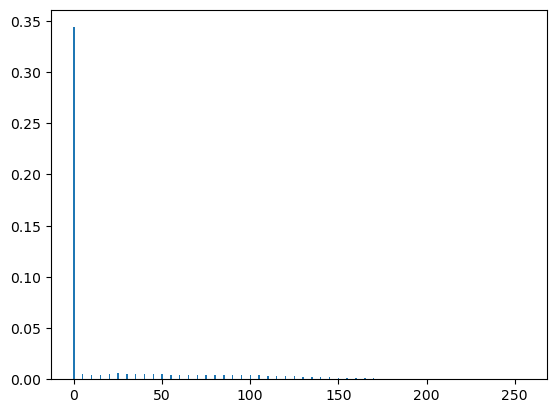

In [33]:
plt.bar(np.arange(256),hist_difference)

In [34]:
img2 = np.copy(img)

In [35]:
left = np.zeros(img2.shape[0])
left = left + 255
left = np.reshape(left, (img2.shape[0],1))


In [36]:
img2 = np.concatenate((img2, left), axis=1)
img2 = np.concatenate((left, img2), axis=1)
up = np.zeros(img2.shape[1])
up = up + 255
up = np.reshape(up, (1,img2.shape[1]))
img2 = np.concatenate((img2, up), axis=0)
img2 = np.concatenate((up, img2), axis=0)
img2

array([[255., 255., 255., ..., 255., 255., 255.],
       [255.,   0.,   0., ...,   0.,   0., 255.],
       [255.,   0.,   0., ...,   0.,   0., 255.],
       ...,
       [255.,   0.,   0., ...,   5.,   4., 255.],
       [255.,   0.,   1., ...,  18.,  18., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

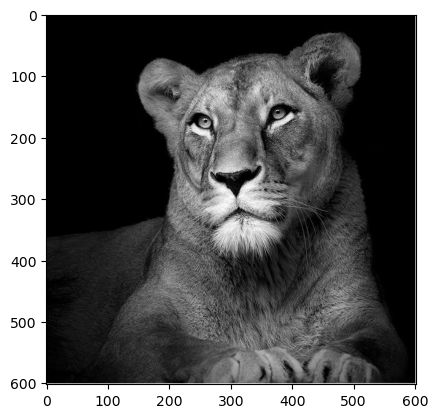

In [37]:
plt.imshow(img2, cmap='gray')

In [38]:
up.shape

(1, 602)

In [39]:
img = cv.imread("d10.png")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")
plt.axis("off")

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
def image_negative(img):
    negative = 255-img
    return negative

def log_transform(img):
    c=2
    log = c*np.log(1+img)
    return log

def power_law(img):
    c=2
    gamma = 2
    transformed_image = c*(img**gamma)
    return transformed_image

In [ ]:
img_neg = image_negative(img)
img_neg
plt.imshow(img_neg, cmap="gray")
plt.axis("off")

In [ ]:
img_log = log_transform(img)
plt.imshow(img_log, cmap="gray")
plt.axis("off")

In [ ]:
img_power = power_law(img)
plt.imshow(img_power, cmap="gray")
plt.axis("off")